In [117]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('student-mat.csv',sep=";")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [8]:
# Input: DataFrame
# Return: list of Numerical Columns
def findCategoryCol(df):
    cat_cols = df.select_dtypes(include=['category', object]).columns
    return cat_cols

In [9]:
#Input: Data Frame, list of Numerical Columns
#Return: list of dictionary of Numerical Columns and its range. eg [{'a':10},{'b':20}....]
def findNumericalCol(df):
    num_cols = df._get_numeric_data().columns
    return num_cols

In [10]:
#Input: Data Frame, list of Category Columns
#Return: list of dictionary of Category Columns and its number of category. eg [{'c':10},{'d':20}....]
def findCategoryRange(df,cat_cols):
    j = {}
    for i in cat_cols: 
        j[i] = len(list(df[i].value_counts().index))
    return j

In [13]:
# Input: Data Frame, Numerical Column Name (eg: age), col_range:(eg: 20)  
# Return: Coding and Change in Data Frame
def encodeNumericalCol(df,col_name):
  # Find the col_name in df min and max value (eg: min:1 max:21) 
  # Coding(1,2) (3,4) (5,6) (7,8) (9,10) (11,12) (13,14) (15,16) (17,18) (19,21) 

      df[col_name] = pd.cut(df[col_name], bins=10)

  #Dividied col_range into 10, coding in to df[col_name] with string type. (eg:1 -> "1-2" Note EdgeCase: the last should become "19-21" that can cut into 10 group)
      return

In [36]:
# Input: Data Frame, Categorical Column Name (eg: school)
# Return: change type to number of each category
def numericalCategorylCol(df, col_name):
    labelencoder = LabelEncoder()
    df[col_name] = labelencoder.fit_transform(df[col_name])

    return

In [33]:
# Input: Data Frame, Numerical Column Name (eg: school), col_range:(eg: 3)
# Output: Coding and Change in Data Frame, codinglst is a lst of dictionary of category name and codingnum
# (eg:  school1 -> 0, codinglst[{"school1":0},{"school2":2},...])
def transferCattoNum(df,col_name):
    codinglst = dict(zip(df[col_name], df[col_name]))
    return codinglst

In [27]:
#Input: Data Frame, list of Numerical Columns,this function should run after
#Return: list of dictionary of Numerical Columns (key is the set of two num col name, and different order count once eg:(a,b) = (b,a), just contain (a,b)) correlation and value 
#(eg: [(a,b):0.5,(a,c):0.7,(a,d):0.03,.....])
# Note, this will be use after transferCattoNum
def calCor(df):
    num_cols = findNumericalCol(df)
    corr_df=df.corr()
    corrlst = corr_df[corr_df.columns.intersection(num_cols)]
    return corrlst

In [39]:
def correlation_fraction(corr,threshold):
    upper_corr_mat = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
    unique_corr_pairs = upper_corr_mat.unstack().dropna()
    matrix = unique_corr_pairs
    matrix = matrix[abs(matrix) >= threshold]
    matrix = matrix[abs(matrix)<1]
    name_lst = matrix.index

    return name_lst

In [109]:
# Calculate entropy--Xin Guo
# there we only choose some variables to calculate the entropy

def cal_entropy(dataset):

    # get the number of columns
    column_num = dataset.shape[1]
    # create the entropy_list
    entropy_list = list()
    for i in range(column_num):
        variable = dataset.iloc[:,i]
        unique_value = set([variable[i] for i in range(variable.shape[0])])
        ent = 0.0
        for per_value in unique_value:
            p = float(variable[variable == per_value].shape[0]) / variable.shape[0]
            logp = np.log2(p)
            ent -= p * logp
        entropy_list.append(ent)
    return np.sum(entropy_list)
# Analyze entropy increasing/ descreasing 

In [58]:
# for quantail from 1%-91%, return the quantile correlation value
def quantileLst(corr):
    corr_lst = corr.quantile(np.arange(0.01, 0.95, 0.05))
    return np.mean(corr_lst,axis=1)

In [99]:
def encoding_func(DataFrame, corr_threshold = 0.2):
    df_original = DataFrame.copy()
    recover_data = DataFrame.copy()
    num_col = findNumericalCol(df_original)
    cat_cols = findCategoryCol(df_original)
    cat_cols = np.array(cat_cols)
    cat_range = findCategoryRange(df_original,cat_cols)

    for i in cat_cols:
        numericalCategorylCol(df_original, i)

    corr = calCor(df_original)
    corr[corr < 0] = -corr
    #print(corr)
    #print(quantileLst(corr))
    cor_frac = correlation_fraction(corr, corr_threshold)
    #print(df_original)
    # Return coding lst 
    unique_cate_lst = []
    for i in range(len(cor_frac)):
        cat1, cat2 = cor_frac[i][0],cor_frac[i][1]
        if cat1 not in unique_cate_lst:
            unique_cate_lst.append(cat1)
        if cat2 not in unique_cate_lst:
            unique_cate_lst.append(cat2)

    #print(unique_cate_lst)
    
    encode_category_name_lst = []
    for col in unique_cate_lst:
        if col in cat_cols:
            encode_category_name_lst.append(col)
            df_original[col] = '***'
        if col in num_col:
            df_num = df[col]
            df_range = df_num.max(axis=0) - df_num.min(axis=0)
            if df_range > 5:
                encodeNumericalCol(df_original, col)
    
    cat_difference_name_lst = np.setdiff1d(cat_cols,encode_category_name_lst)
    for col in cat_difference_name_lst:
        df_original[col] = recover_data[col]
    return df_original, unique_cate_lst, corr

In [100]:
encoding_df, coding_lst, corr = encoding_func(df)

In [101]:
encoding_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,***,***,"(17.8, 18.5]",***,GT3,A,4,4,***,***,...,4,3,4,1,1,3,6,"(4.6, 6.2]","(5.7, 7.6]","(4.0, 6.0]"
1,***,***,"(16.4, 17.1]",***,GT3,T,1,1,***,***,...,5,3,3,1,1,3,4,"(4.6, 6.2]","(3.8, 5.7]","(4.0, 6.0]"
2,***,***,"(14.993, 15.7]",***,LE3,T,1,1,***,***,...,4,3,2,2,3,3,10,"(6.2, 7.8]","(7.6, 9.5]","(8.0, 10.0]"
3,***,***,"(14.993, 15.7]",***,GT3,T,4,2,***,***,...,3,2,2,1,1,5,2,"(14.2, 15.8]","(13.3, 15.2]","(14.0, 16.0]"
4,***,***,"(15.7, 16.4]",***,GT3,T,3,3,***,***,...,4,3,2,1,2,5,4,"(4.6, 6.2]","(9.5, 11.4]","(8.0, 10.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,***,***,"(19.9, 20.6]",***,LE3,A,2,2,***,***,...,5,5,4,4,5,4,11,"(7.8, 9.4]","(7.6, 9.5]","(8.0, 10.0]"
391,***,***,"(16.4, 17.1]",***,LE3,T,3,1,***,***,...,2,4,5,3,4,2,3,"(12.6, 14.2]","(15.2, 17.1]","(14.0, 16.0]"
392,***,***,"(20.6, 21.3]",***,GT3,T,1,1,***,***,...,5,5,3,3,3,3,3,"(9.4, 11.0]","(7.6, 9.5]","(6.0, 8.0]"
393,***,***,"(17.8, 18.5]",***,LE3,T,3,2,***,***,...,4,4,1,3,4,5,0,"(9.4, 11.0]","(11.4, 13.3]","(8.0, 10.0]"


In [102]:
coding_lst

['age',
 'school',
 'address',
 'Fedu',
 'Medu',
 'Mjob',
 'Fjob',
 'guardian',
 'traveltime',
 'studytime',
 'sex',
 'failures',
 'schoolsup',
 'paid',
 'famsup',
 'higher',
 'internet',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'G1',
 'G2',
 'G3']

In [103]:
corr

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,1.000000,0.012286,0.377610,0.279797,0.064866,0.045923,0.133333,0.079807,0.056670,0.018974,...,0.047926,0.032988,0.007152,0.114209,0.065087,0.042651,0.088480,0.025731,0.050086,0.045017
sex,0.012286,1.000000,0.028606,0.028504,0.089862,0.023443,0.078228,0.034878,0.191421,0.084957,...,0.058971,0.238744,0.075897,0.268171,0.274194,0.143588,0.066962,0.091839,0.091099,0.103456
age,0.377610,0.028606,1.000000,0.146722,0.037847,0.029598,0.163658,0.163438,0.069104,0.035191,...,0.053940,0.016434,0.126964,0.131125,0.117276,0.062187,0.175230,0.064081,0.143474,0.161579
address,0.279797,0.028504,0.146722,1.000000,0.072472,0.042572,0.138804,0.072178,0.108818,0.001911,...,0.014258,0.034878,0.068835,0.093494,0.101126,0.040355,0.027874,0.069704,0.126037,0.105756
famsize,0.064866,0.089862,0.037847,0.072472,1.000000,0.149612,0.043068,0.058879,0.071386,0.084448,...,0.022776,0.017695,0.023064,0.101521,0.103425,0.028992,0.035783,0.071445,0.081223,0.081407
Pstatus,0.045923,0.023443,0.029598,0.042572,0.149612,1.000000,0.123565,0.088730,0.054476,0.033892,...,0.025179,0.038717,0.003459,0.030590,0.006045,0.022307,0.134937,0.016868,0.041382,0.058009
Medu,0.133333,0.078228,0.163658,0.138804,0.043068,0.123565,1.000000,0.623455,0.454805,0.157920,...,0.003914,0.030891,0.064094,0.019834,0.047123,0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,0.079807,0.034878,0.163438,0.072178,0.058879,0.088730,0.623455,1.000000,0.243327,0.200169,...,0.001370,0.012846,0.043105,0.002386,0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
Mjob,0.056670,0.191421,0.069104,0.108818,0.071386,0.054476,0.454805,0.243327,1.000000,0.196758,...,0.038584,0.114321,0.003169,0.076076,0.012051,0.065220,0.050254,0.081674,0.097390,0.102082
Fjob,0.018974,0.084957,0.035191,0.001911,0.084448,0.033892,0.157920,0.200169,0.196758,1.000000,...,0.013709,0.047475,0.010340,0.077897,0.070024,0.018058,0.008196,0.057661,0.067006,0.042286


In [132]:
corr_threshold_lst = quantileLst(corr)
corr_threshold_lst

0.01    0.005034
0.06    0.011692
0.11    0.017824
0.16    0.024777
0.21    0.029882
0.26    0.037321
0.31    0.043675
0.36    0.050033
0.41    0.057394
0.46    0.063889
0.51    0.070935
0.56    0.080091
0.61    0.087440
0.66    0.096271
0.71    0.109818
0.76    0.121941
0.81    0.134527
0.86    0.157358
0.91    0.213836
dtype: float64

In [133]:
entropy= []
df_entropy = cal_entropy(df)
for val in corr_threshold_lst:
    df_change,_,_ = encoding_func(df,val)
    entropy.append(cal_entropy(df_change))

In [134]:
entropy

[31.828174914441533,
 31.828174914441533,
 31.828174914441533,
 31.828174914441533,
 31.828174914441533,
 31.828174914441533,
 31.828174914441533,
 31.828174914441533,
 31.828174914441533,
 31.828174914441533,
 31.828174914441533,
 31.828174914441533,
 31.828174914441533,
 31.828174914441533,
 31.828174914441533,
 32.82794836178127,
 32.82794836178127,
 36.04217047736631,
 41.69809919751257]

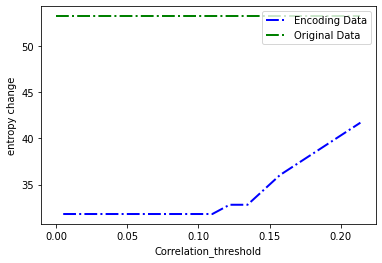

In [140]:
plt.plot(corr_threshold_lst,entropy, color='blue',linewidth=2, linestyle = '-.')
plt.hlines(df_entropy,0,max(corr_threshold_lst),color = 'green',linewidth=2,linestyle = '-.')
plt.xlabel('Correlation_threshold')
plt.ylabel('entropy change')
plt.legend(['Encoding Data', 'Original Data'])